In [4]:
import json 
import networkx as nx
  

from conjecture.consolidated_functions import *
from conjecture.all_valid_orderings import *
from conjecture.optimization_functions import *
from iterative_heuristic.modified_etf import Mod_ETF
from iterative_heuristic.approximate_speeds import *
from iterative_heuristic.consolidated import *
from makespan_energy.construct_graph_util import *
from makespan_energy.visualization_util import *
import networkx as nx
import numpy as np
import math
import plotly.express as px
import pandas as pd 

In [2]:
# Construct DAGs

file_list = ['seismology-chameleon-100p-001.json',
'seismology-chameleon-200p-001.json',
'seismology-chameleon-300p-001.json',
'seismology-chameleon-400p-001.json',
'seismology-chameleon-500p-001.json',
'seismology-chameleon-600p-001.json',
'seismology-chameleon-700p-001.json',
'seismology-chameleon-800p-001.json',
'seismology-chameleon-900p-001.json',
'seismology-chameleon-1000p-001.json',
'seismology-chameleon-1100p-001.json']
    
G_list = []

for file in file_list:
    
    # Opening JSON file 
    f = open('pegasus-traces-master/seismology/chameleon-cloud/' + file) 

    # returns JSON object as  
    # a dictionary 
    data = json.load(f) 

    taskname_to_id = {}
    id_count = 0

    G = nx.DiGraph()

    for task in data['workflow']['jobs']:

        child_id = id_count
        id_count += 1
        taskname_to_id[task['name']] = child_id

        if not G.has_node(child_id):
                G.add_node(child_id)

        for parent in task['parents']:
            if parent in taskname_to_id:

                parent_id = taskname_to_id[parent]

            else:

                parent_id = id_count
                id_count += 1
                taskname_to_id[parent] = parent_id


            if not G.has_edge(parent_id, child_id):
                    G.add_edge(parent_id, child_id)
    print(len(G.nodes))

    
   
    G_list.append(G)
    
    # Closing file 
    f.close() 

101
201
301
401
501
601
701
801
901
1001
1101


In [5]:
mrt = True
tie_breaking_rule = 2
plot = False

x = []
y = []
lbs= []
ubs = []

y_optimal = []
y_lb = []
bad_one = 0
box_whiskers_data = []
num_machines = 3
naives1 = []
naives2 = []
heur = []
for G in G_list:
    
    
    ratio = []
    num_tasks = len(G.nodes)
    
    w = [1 for _ in range(num_tasks)]
    s = [1 for _ in range(num_tasks)]

    naive1,naive2, true, order =iterative_and_naive_heuristic_no_ratio_reversed(num_machines, w, G, naive_version=4, verbose=False)
    # _, _, obj_opt, _ = get_objective_single_ordering(True, G, w, order, plot=plot, compare=False)
    # d = get_optimal_schedule(mrt, G, num_machines, w, plot, verbose=False)
    # if solver was successful
    # and d["objective_task_scaling"] != 10000000
    #if obj_opt != 10000000 and d["objective_task_scaling"] != 10000000:
        
    x.append(num_tasks)
    heur.append(true)
    naives1.append(naive1)
    naives2.append(naive2)
    print(naive1, naive2)
    # y.append(obj_opt)
    # lbs.append(d["objective_task_scaling"])
    ub = obj_ub_precise = 2 * sum(psize_to_speed(ub_lst_graph(G, order)))
    ubs.append(ub)
    print("______________________________________________________")
 

798.4656927671219 1381.5653300949548
______________________________________________________
2218.014275249822 5117.210455103482
______________________________________________________
4049.777930142106 11209.642481806768
______________________________________________________
6215.912469276615 19660.2756237672
______________________________________________________
8671.003140182067 30466.98856064123
______________________________________________________
11384.189625366027 43630.48839921005
______________________________________________________
14333.047575866587 59152.18935303602
______________________________________________________
17500.052237179887 77029.97010177557
______________________________________________________
20870.97939556249 97264.53775220989
______________________________________________________
24434.27830720705 119857.3065179014
______________________________________________________
28180.071781246992 144806.15507850648
________________________________________________

In [6]:
print("x is \n", x)
print("ubs are \n", ubs)
print("naives1 are \n",naives1)
print("naives2 are \n", naives2)
print("heurs are \m",heur)

x is 
 [101, 201, 301, 401, 501, 601, 701, 801, 901, 1001, 1101]
ubs are 
 [817.1300297825912, 2245.9986711085567, 4085.0769363456134, 6257.388270026915, 8717.848950617325, 11435.969947442629, 14389.366414882037, 17560.53500226631, 20935.43444089581, 24502.49032813898, 28251.805050158287]
naives1 are 
 [798.4656927671219, 2218.014275249822, 4049.777930142106, 6215.912469276615, 8671.003140182067, 11384.189625366027, 14333.047575866587, 17500.052237179887, 20870.97939556249, 24434.27830720705, 28180.071781246992]
naives2 are 
 [1381.5653300949548, 5117.210455103482, 11209.642481806768, 19660.2756237672, 30466.98856064123, 43630.48839921005, 59152.18935303602, 77029.97010177557, 97264.53775220989, 119857.3065179014, 144806.15507850648]
heurs are \m [798.6347236180671, 2217.8494568618926, 4049.1821503099013, 6215.998535573196, 8670.827713161454, 11383.574538597868, 14333.112808673905, 17499.872866230646, 20870.355713252164, 24434.332943043533, 28179.890198358495]


In [7]:
ratios1 = [n/h for n,h in zip(naives1, heur)]
print(ratios1)
ratios2 = [n/h for n,h in zip(naives2, heur)]
print(ratios2)

[0.999788350235788, 1.0000743145065232, 1.0001471358437553, 0.9999861540674297, 1.000020231865563, 1.0000540328317853, 0.9999954488038859, 1.000010249842991, 1.000029883645439, 0.9999977639726605, 1.0000064437046141]
[1.7299089173533906, 2.3072848516706763, 2.768371998515514, 3.1628507489592366, 3.5137347400404892, 3.832758177255638, 4.126960426714786, 4.401744554980148, 4.660415907068095, 4.905282530007631, 5.138634468027188]


In [1]:
x =[101, 201, 301, 401, 501, 601, 701, 801, 901, 1001, 1101]
ratios1 = [0.999788350235788, 1.0000743145065232, 1.0001471358437553, 0.9999861540674297, 1.000020231865563, 1.0000540328317853, 0.9999954488038859, 1.000010249842991, 1.000029883645439, 0.9999977639726605, 1.0000064437046141]
ratios2 = [1.7299089173533906, 2.3072848516706763, 2.768371998515514, 3.1628507489592366, 3.5137347400404892, 3.832758177255638, 4.126960426714786, 4.401744554980148, 4.660415907068095, 4.905282530007631, 5.138634468027188]


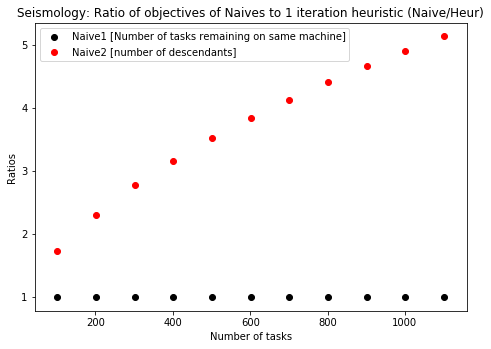

In [2]:
import matplotlib.pyplot as plt
import math

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])


#print(ub_ratio)
#plt.scatter(obj_lb_lst[:,0], obj_lb_lst[:,1], label='lower bound', color="g", linewidths=0.1)


# plt.scatter(x, y, s=5, label='opt/lb', color='b')
plt.scatter(x, ratios1, label='Naive1 [Number of tasks remaining on same machine]', color='k')
plt.scatter(x, ratios2, label='Naive2 [number of descendants]', color='r')
#plt.scatter(x, naives, label='Naives', color='g')
plt.xlabel('Number of tasks')
plt.ylabel('Ratios')
plt.title("Seismology: Ratio of objectives of Naives to 1 iteration heuristic (Naive/Heur)")
plt.legend()
plt.show()

In [ ]:
import csv
with open("seismology_both_naives_heur_3_machines.csv", 'w+') as f:
    writer = csv.writer(f)
    writer.writerow(["task_size", "naive1", "heuristic", "upperbound"])
    writer.writerows(zip(x,  naives1, naives2, heur,  ubs))